# EDA

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.graph_objects as go
import helper_functions as hlf
import joblib as jb

%matplotlib inline

Using TensorFlow backend.


### Original Image

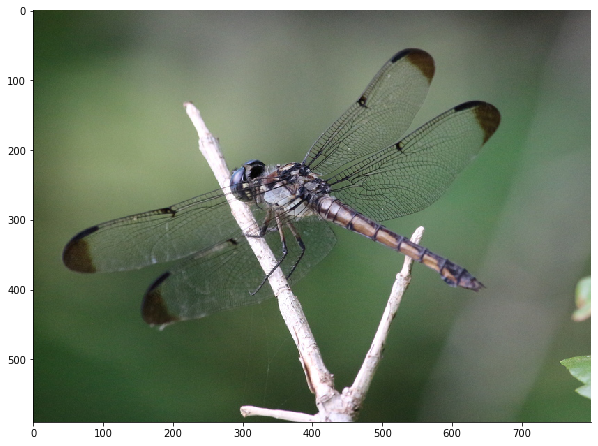

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
imagepath = './test_images/dragon.jpg'
image = Image.open(imagepath)
plt.imshow(image)
plt.show()

### Resizsing Image
* Uniform size for every image while not loosing too much details

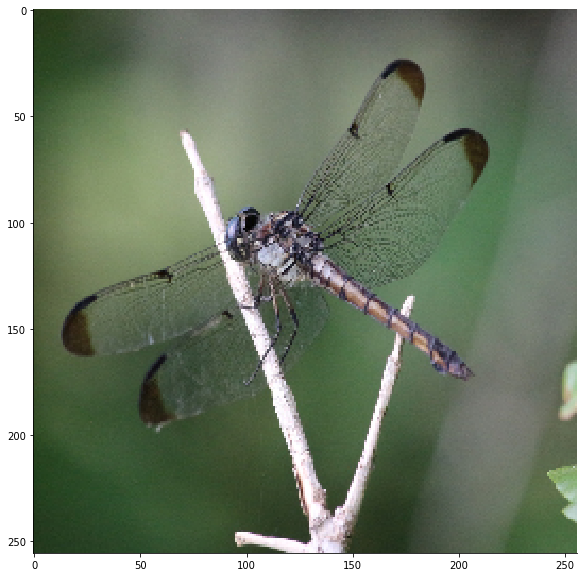

In [3]:
dimensions = (256, 256)
image = image.resize(dimensions)
plt.imshow(image)
# plt.savefig('./Images/dragon_resized')
plt.show()

### Grayscaling Image
* Can cause more harm than help

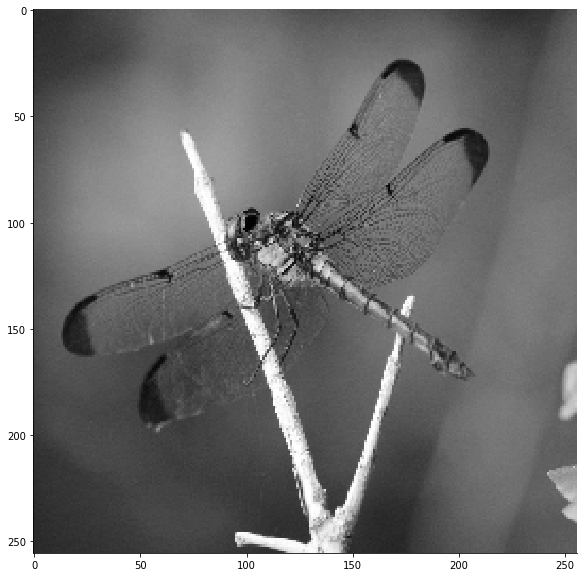

In [4]:
image = image.convert(mode='L')
plt.imshow(image, cmap='gray')
plt.savefig('./Images/dragon_gray.png')
plt.show()

### Rotate Images
* Increase the dataset by creating a mirror image

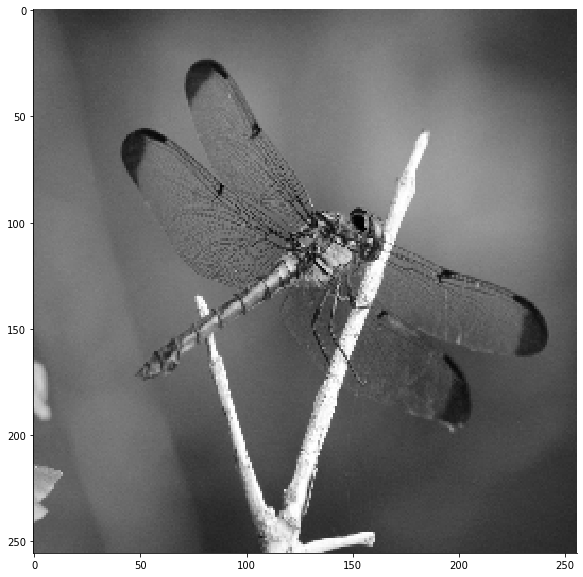

In [5]:
chirl_image = image.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(chirl_image, cmap='gray')
plt.savefig('./Images/dragon_mirror.png')
plt.show()

### Convert to NumPy and Noramalize Pixel Values

In [6]:
image = np.array(image)

print(f'First pixel value: {image[0][0]}')
print(f'Image shape: {image.shape}')

image = image / 255

print(f'First pixel value after normalizing: {image[0][0]}')

First pixel value: 47
Image shape: (256, 256)
First pixel value after normalizing: 0.1843137254901961


### Checking the amount of images per animal

In [7]:
dampath = r'E:\classification_damsel_images\\'
extension = 'jpg'

dam_images = os.listdir(dampath)
damsels = len(dam_images)

In [8]:
danpath = r'E:\classification_dragon_images\\'
extension = 'jpg'

dra_images = os.listdir(danpath) 
dragons = len(dra_images)
train_drags = int(dragons * 0.75)

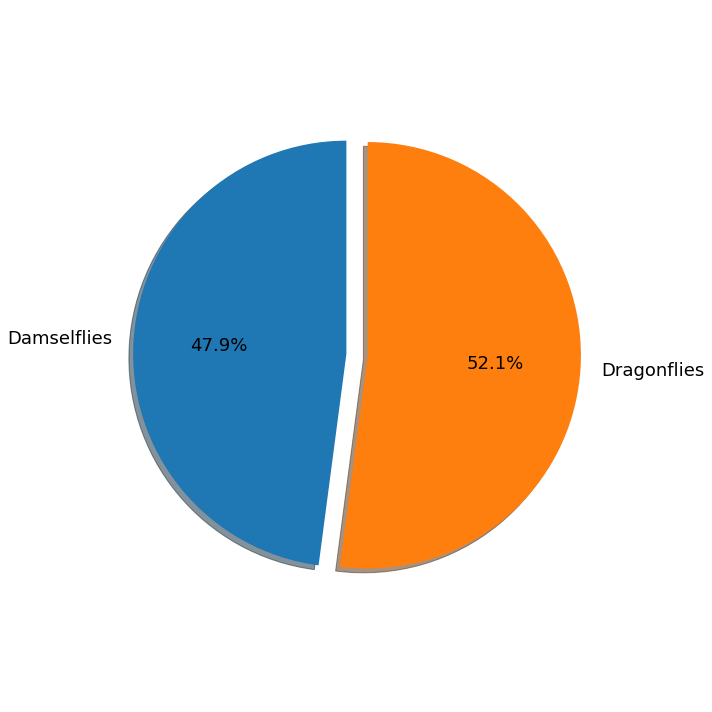

In [9]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Damselflies', 'Dragonflies'
sizes = damsels/2, dragons/2
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 18})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig('./Images/image_pie.png')
plt.show()

### Difficult to Classify

- Image not focused on the insect
- Dominant background
- Lower image quality

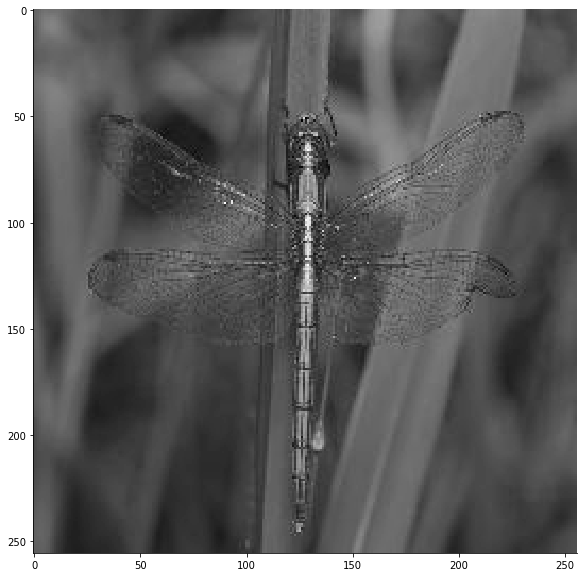

In [11]:
# Easy classification
# Centered specimen, minimal background noise
img = jb.load('./test_images/dragon_correct.pkl')
plt.imshow(img.reshape(256, 256), cmap='gray')
# plt.savefig('./Images/correct_dragon.png')
plt.show()

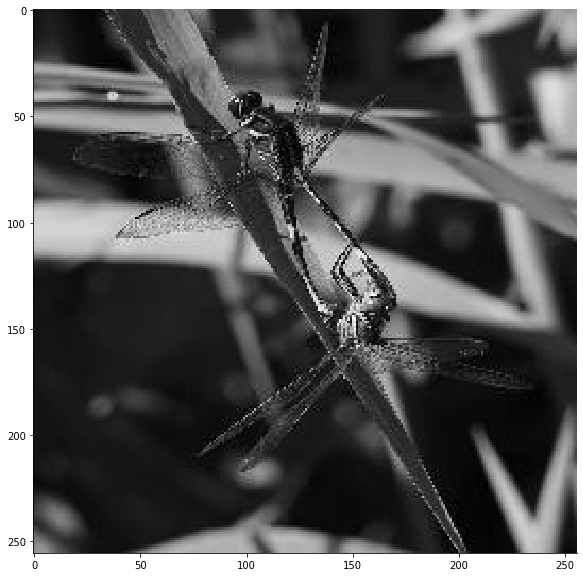

In [12]:
# Difficult classification
# Tweo dragonflies mating in the same image - likely to confuse the model
img = jb.load('./test_images/dragon_miss.pkl')
plt.imshow(img.reshape(256, 256), cmap='gray')
# plt.savefig('./Images/miss_dragon.png')
plt.show()